<a href="https://colab.research.google.com/github/JaymeManhica/Project_Data_Mining/blob/main/C%C3%B3pia_de_meu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


vou Carregar o conjunto de dados da California Housing

In [3]:
california= fetch_california_housing()


**Carregar o conjunto de dados**

In [4]:
california_housing = fetch_california_housing()

 Criar um DataFrame do Pandas

In [5]:
california = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


**Adicionar uma coluna para os valores medianos das casas (target)**, **isto é,A coluna "MedHouseValue" (Valor Mediano das Casas) é uma coluna crucial no conjunto de dados "California Housing". Ela armazena os valores medianos das casas para diferentes setores censitários na Califórnia. Essa coluna serve como o alvo ou rótulo que queremos prever em um problema de regressão.**

In [6]:
california['MedHouseValue'] = california_housing.target

**Mostrar as primeiras linhas do DataFrame**

In [7]:
print(california.head(10))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25 

importar o algoritm KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
linear_regressor = LinearRegression()

Obter estatísticas descritivas dos atributos e do valor alvo

método do Pandas DataFrame que calcula várias estatísticas descritivas para cada coluna numérica do DataFrame. As estatísticas incluídas são:

count: O número de valores não nulos na coluna.
mean: A média dos valores na coluna.
std: O desvio padrão dos valores na coluna.
min: O valor mínimo na coluna.
25%: O primeiro quartil, também conhecido como o percentil 25.
50%: O segundo quartil, também conhecido como a mediana ou percentil 50.
75%: O terceiro quartil, também conhecido como o percentil 75.
max: O valor máximo na coluna.
Isso é útil para obter uma compreensão geral da distribuição e das propriedades estatísticas dos dados.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print(california.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  MedHouseValue  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean       3.070655     35.631861   -119.569704       2.068558  
std       10.386050      2.135952      2.003532       1.153956  
min        0.692308     32.5

Calcular a matriz de correlação

A matriz de correlação é uma tabela que mostra as correlações entre pares de variáveis em um conjunto de dados. A correlação é uma medida estatística que indica a relação entre duas variáveis. Ela varia de -1 a 1, onde:

Um valor próximo a 1 indica uma correlação positiva forte, ou seja, quando uma variável aumenta, a outra também tende a aumentar.
Um valor próximo a -1 indica uma correlação negativa forte, ou seja, quando uma variável aumenta, a outra tende a diminuir.
Um valor próximo a 0 indica uma correlação fraca, sugerindo que as variáveis têm pouca relação linear entre si.
A matriz de correlação é útil para entender como as variáveis estão relacionadas e é frequentemente usada na análise exploratória de dados e na seleção de recursos em tarefas de modelagem estatística ou de aprendizado de máquina.

In [11]:
correlation_matrix = california.corr()


Plotar um heatmap da matriz de correlação usando Seaborn

permitindo a fácil identificação de padrões de correlação entre variáveis.

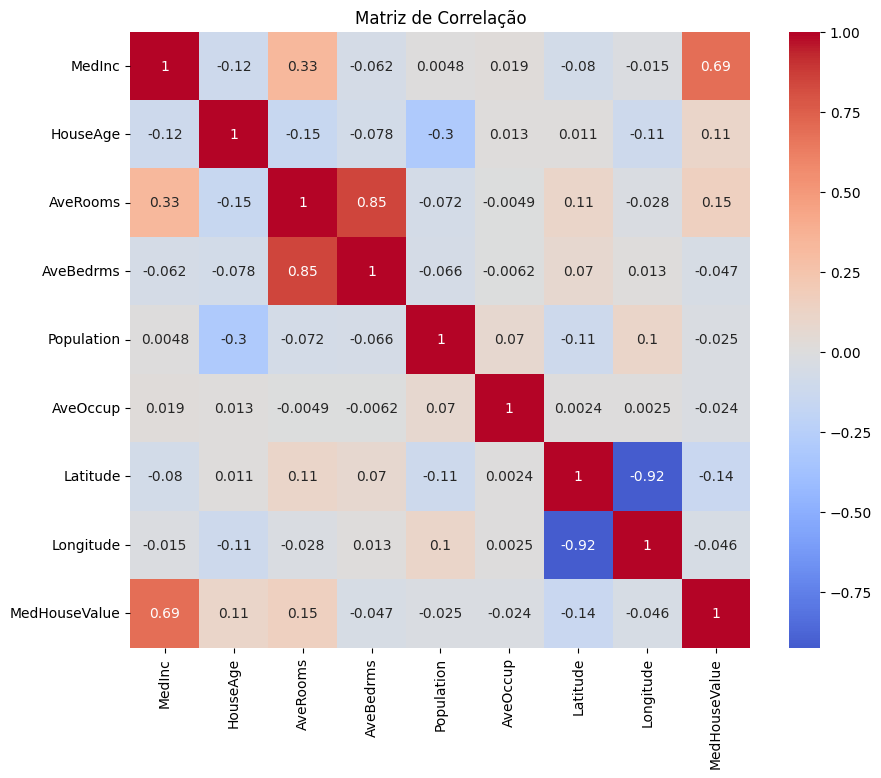

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()


Plotar histogramas dos atributos e do valor alvo

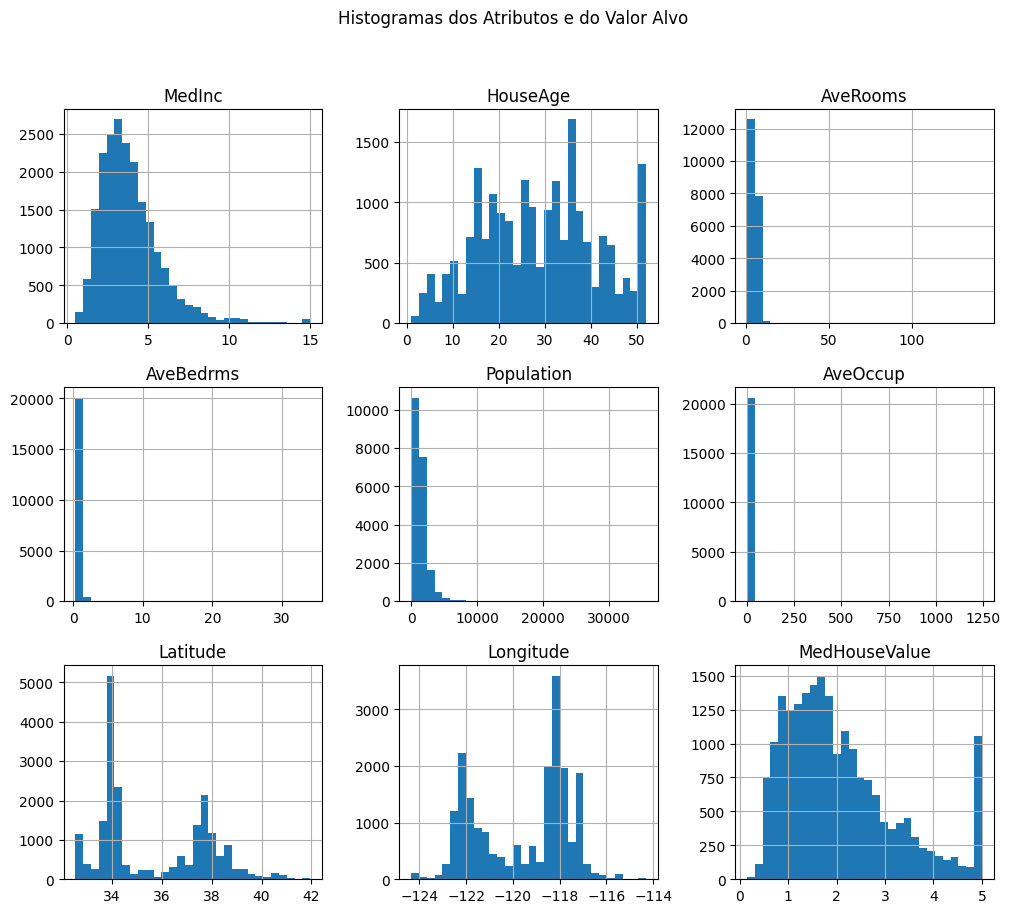

In [13]:
california.hist(bins=30, figsize=(12, 10))
plt.suptitle("Histogramas dos Atributos e do Valor Alvo")
plt.show()

dispersão geoespacial onde as cores dos pontos são determinadas pelo valor mediano das casas (MedHouseValue). Quanto mais quente a cor (vermelho), maior é o valor mediano das casas naquela região.

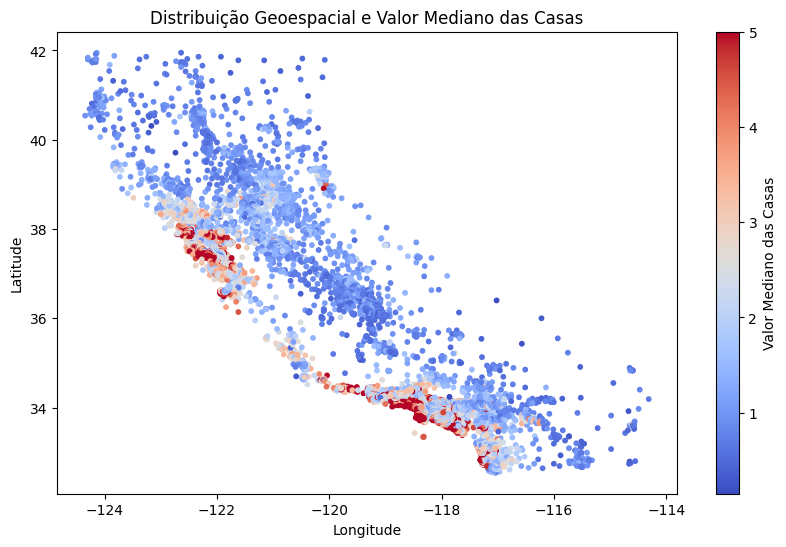

In [14]:
import matplotlib.pyplot as plt



# Plotar um mapa de dispersão geoespacial
plt.figure(figsize=(10, 6))
plt.scatter(california['Longitude'], california['Latitude'], c=california['MedHouseValue'], cmap='coolwarm', s=10)
plt.colorbar(label='Valor Mediano das Casas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Geoespacial e Valor Mediano das Casas')
plt.show()



Vou apresentar dua formas de ver os outliers, com boxpots que é a mais usada e ideal e outra com diagrama de pontos.  vamos fazer observações com uma combinação única de características identificáveis como
sendo notavelmente diferentes das outras observações

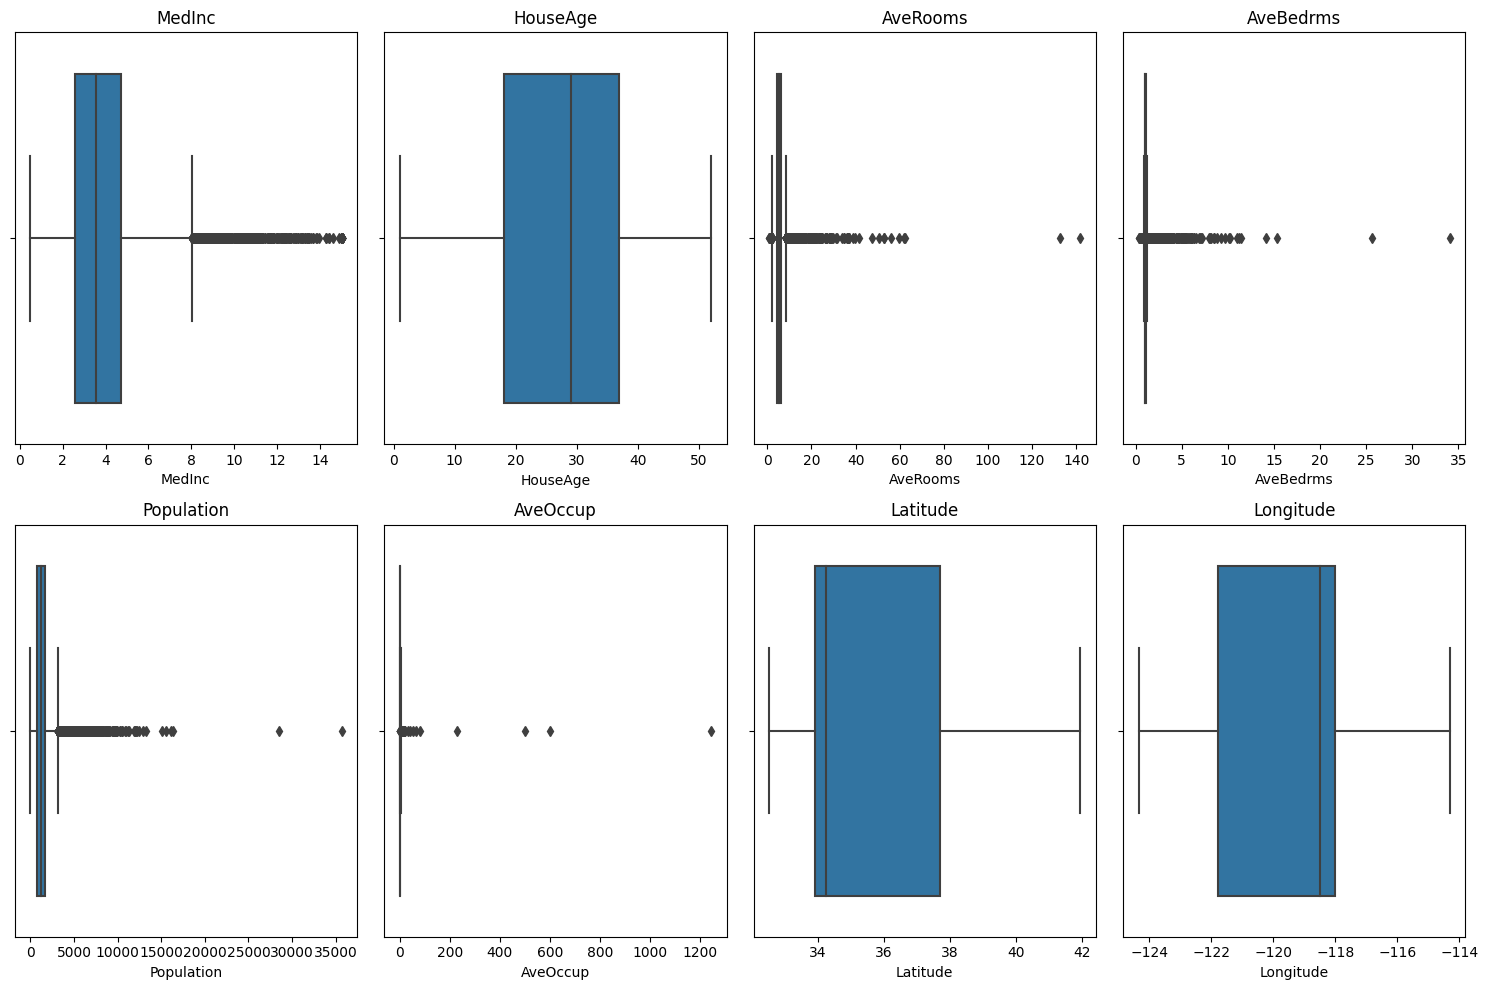

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns



# Selecionar os atributos numéricos para análise de outliers
numeric_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Criar subplots para visualizar os box plots dos atributos
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=california[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


no diagrama Diagrama de pontos e box plots verificamos alguns dados isolados. Os investigadores e analistas dos dados têm em mente de que incluir observações
discrepantes na análise distorce os resultados, assim, uma das primeiras opções tem sido
excluir estas observações da análise. Por outro lado, excluir uma ou mais observações
implica reduzir o tamanho da amostra, o que pode ser inadequado para algumas análises,
porque a menores tamanhos da amostra as generalizações dos resultados são menos precisas



Análise de Domínio: Primeiro, é importante entender o que os outliers representam no contexto de imóveis na Califórnia. Eles podem ser erros de digitação, informações verdadeiramente raras ou podem conter informações valiosas. Consultar especialistas no mercado imobiliário pode ajudar a interpretar os outliers.

Remoção com Cuidado: Se os outliers forem definitivamente erros ou valores extremamente improváveis, a remoção pode ser uma opção. No entanto, isso deve ser feito com cuidado, pois a remoção indiscriminada de outliers pode afetar a representatividade dos dados.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


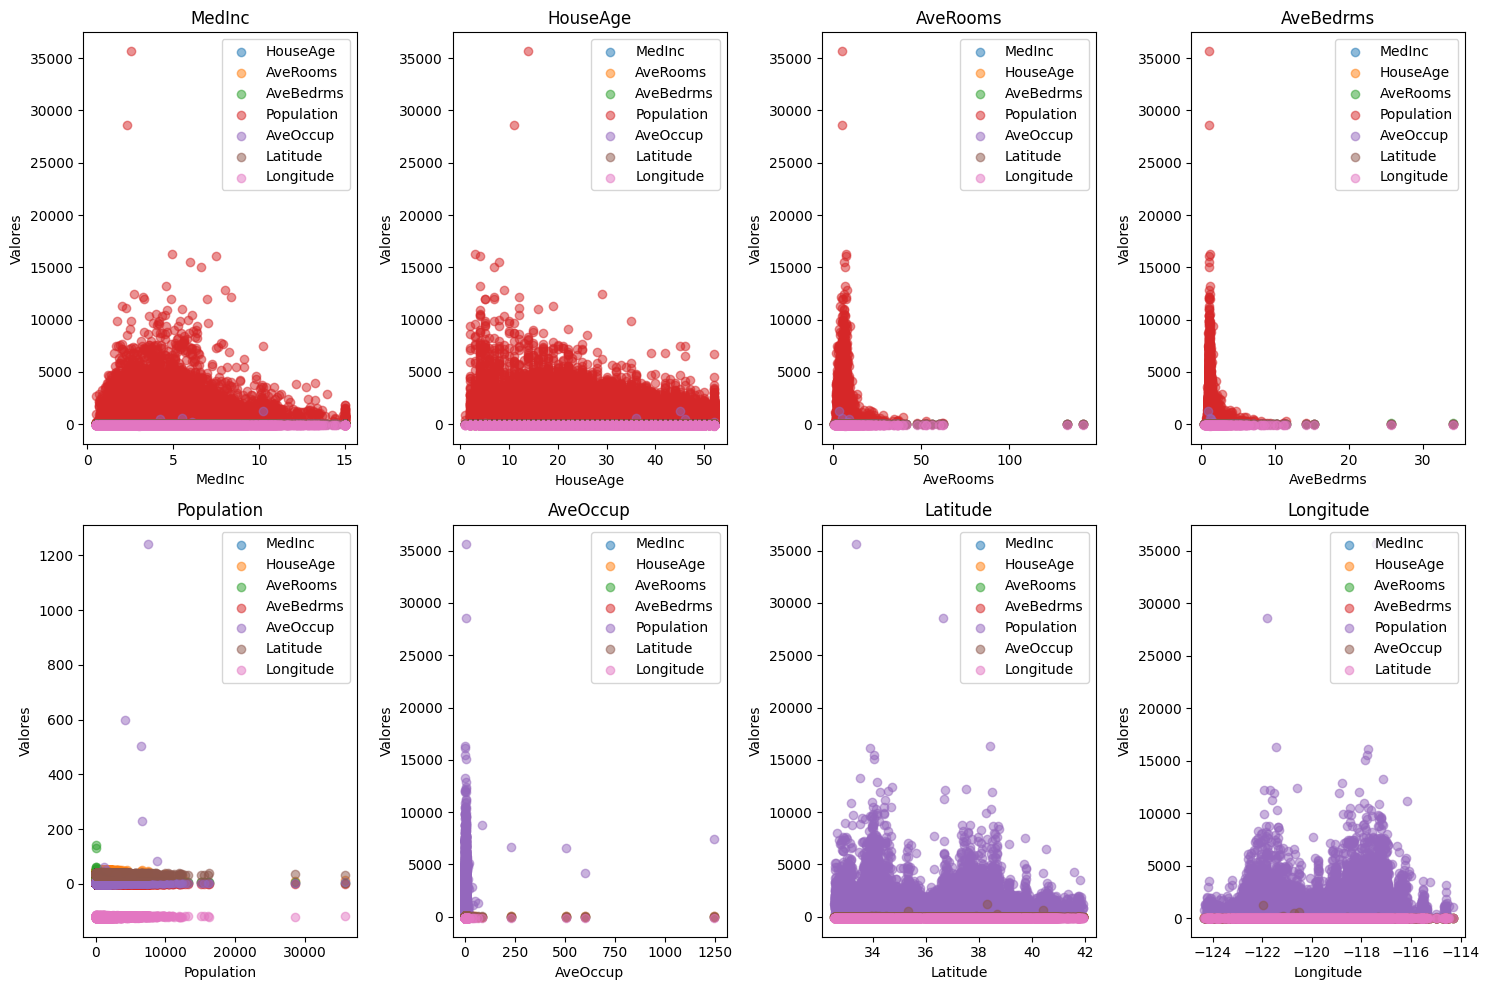

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' seja o DataFrame que contém seus dados
numeric_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Configuração do layout
num_rows = 2
num_cols = 4
plt.figure(figsize=(15, 10))

# Criação dos diagramas de pontos
for i, feature_x in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    for feature_y in numeric_features:
        if feature_x != feature_y:
            plt.scatter(california[feature_x], california[feature_y], alpha=0.5, label=feature_y)
    plt.xlabel(feature_x)
    plt.ylabel('Valores')
    plt.title(feature_x)
    plt.legend()

# Melhora o layout
plt.tight_layout()

# Exibição dos diagramas de pontos
plt.show()


